# LIF comparison

## setup

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
import matplotlib

filenames = [
    ["Exact", "lif_exact.csv"],
    ['Lava (CPU)', 'lif_lava_cpu_float.csv'],
    ['Lava (Loihi)', 'lif_lava_loihi_fixed.csv'],
    ['Nengo', 'lif_nengo.csv'],
    ['Norse', 'lif_norse.csv'],
    ['Rockpool', 'lif_rockpool.csv'],
    ['Sinabs', 'lif_sinabs.csv'],
    ['snnTorch', 'lif_snntorch.csv'],
    ['SpiNNaker2', 'lif_spinnaker2.csv'],
    ['Spyx', 'lif_spyx.csv'],
]
data = {
    name: np.loadtxt(filename, delimiter=',')
    for name, filename in filenames
}
SKIP_TIMESTEPS = 0
voltages = [
    (name, data[name][SKIP_TIMESTEPS:, 1] / data[name][:, 1].max()) for name in data.keys()
]
spikes = [
    (name, np.where(data[name][SKIP_TIMESTEPS:, 2] == 1)[0]) for name in data.keys()
]
input_data = data['Norse'][SKIP_TIMESTEPS:, 0]

In [2]:
!ls

lif_comparison.ipynb	  lif_lava_loihi_fixed.png  lif_snntorch.ipynb
lif_exact.csv		  lif_nengo.csv		    lif_spinnaker2.csv
lif_exact_sim.ipynb	  lif_nengo.ipynb	    lif_spinnaker2.py
lif_exact_sim.py	  lif_norse.csv		    lif_spyx.csv
lif.ipynb		  lif_norse.nir		    lif_spyx.ipynb
lif_lava_cpu_fixed.csv	  lif_rockpool.csv	    lif_trace_nengo.png
lif_lava_cpu_fixed.png	  lif_rockpool.ipynb	    lif_trace_norse.png
lif_lava_cpu_float.csv	  lif_rockpool.nir	    lif_trace_rockpool.png
lif_lava_cpu_float.png	  lif_sinabs.csv	    README.md
lif_lava.ipynb		  lif_sinabs.ipynb	    snntorch_debug.py
lif_lava_loihi_fixed.csv  lif_snntorch.csv


## 2D comparison plot

/tmp/ipykernel_3227481/1594710020.py:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for l in legend.legendHandles:
/tmp/ipykernel_3227481/1594710020.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


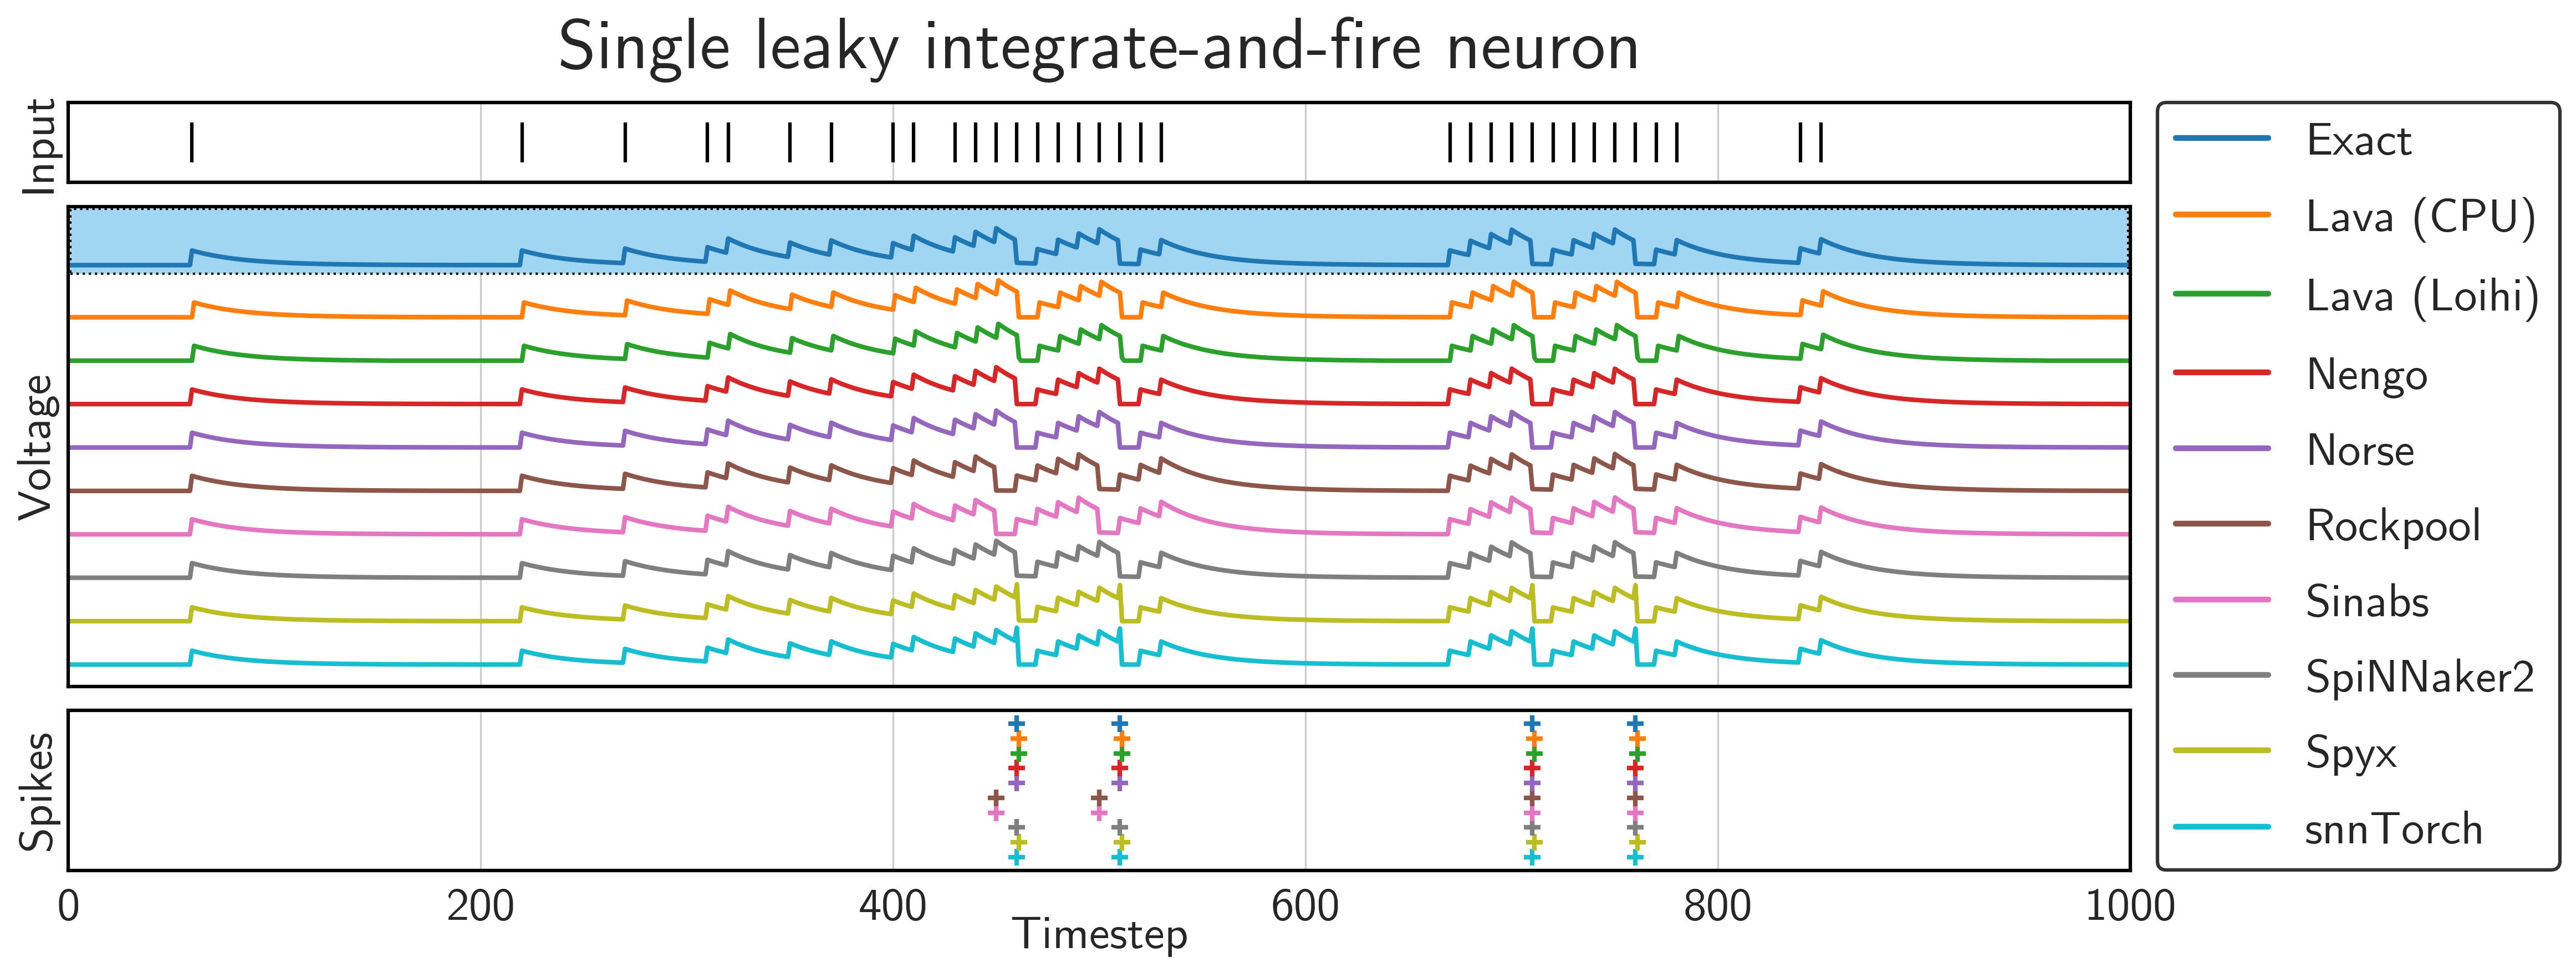

In [114]:
# plt.style.use("../plots.mplstyle")
# seaborn.set_context("paper", font_scale=1)
# plt.style.use("seaborn-v0_8-paper")
seaborn.set_style("whitegrid")
font = {'family' : 'CMU Sans Serif',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rcParams["axes.edgecolor"] = "black"
matplotlib.rcParams["axes.linewidth"] = 1.5
matplotlib.rcParams["legend.edgecolor"] = "black"

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# fig.suptitle('Comparison of Leaky Integrate-and-Fire dynamics')
spec = mpl.gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1.5, 6, 2])
#fig = plt.figure(figsize=(12, 6), dpi=300)
fig, (ax0, ax1, ax3) = plt.subplots(3, 1, gridspec_kw={"height_ratios": [1, 6, 2], "hspace": 0.1}, sharex=True, figsize=(16, 6), dpi=300)

ax0.set_title("Single leaky integrate-and-fire neuron", pad=15, fontsize=30)

# ax0 = fig.add_subplot(spec[0])
ax0.set_ylabel('Input')
ax0.set_yticks([])
ax0.eventplot(np.where(input_data == 1.)[0], colors='k')
ax0.set_ylim(0, 2)
ax0.set_xlim(0, 1000)

# ax1 = fig.add_subplot(spec[1], sharex=ax0)
# handles = []
for idx, (name, voltage) in enumerate(sorted(voltages)):
    if idx == 0:
        r = plt.Rectangle((1, -idx - 0.2), 998, 1.5, facecolor="#a0d6f2", edgecolor="black", linestyle="dotted")
        ax1.add_artist(r)
        offset = 0
    else:
        offset = -idx - 0.2
    ax1.plot(voltage * 0.85 + offset, label=name, linewidth=2)
    
ax1.set_ylabel('Voltage')
ax1.set_yticks([])
# ax1.set_yticklabels([])
ax1.grid(axis='y', alpha=0.5)

# ax3 = fig.add_subplot(spec[2], sharex=ax1)
ax3.set_ylabel('Spikes')
for idx, (name, spike) in enumerate(sorted(spikes)[::-1]):
    yval = 1 + idx / (len(spikes)-1)
    ax3.scatter(spike, np.ones_like(spike) * yval, s=50, marker='+', color=colors[len(spikes) - idx - 1], linewidths=2)
ax3.set_ylim(0.9, 2.1)
ax3.set_yticklabels([])
ax3.set_yticks([])
ax3.grid(axis='y', alpha=0.5)
ax3.set_xlabel('Timestep', labelpad=-6)

legend = fig.legend(bbox_to_anchor=(0.87, -0.097, 0.2, 1), fontsize=20, labelspacing=0.73)
legend.get_frame().set_linewidth(1.5)
for l in legend.legendHandles:
    l.set_linewidth(2.5)
# fig.legend(bbox_to_anchor=(1, 1), ncols=len(voltages))

plt.tight_layout()
plt.savefig('../figures/lif_comparison.pdf', dpi=300, bbox_inches="tight")
plt.show()

## 3D version (experimental, not updated)

Still experimental, will need to stitch the graphics together manually because matplotlib doesn't want to scale 3D graphics properly..

In [4]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

NameError: name 'v_spin' is not defined

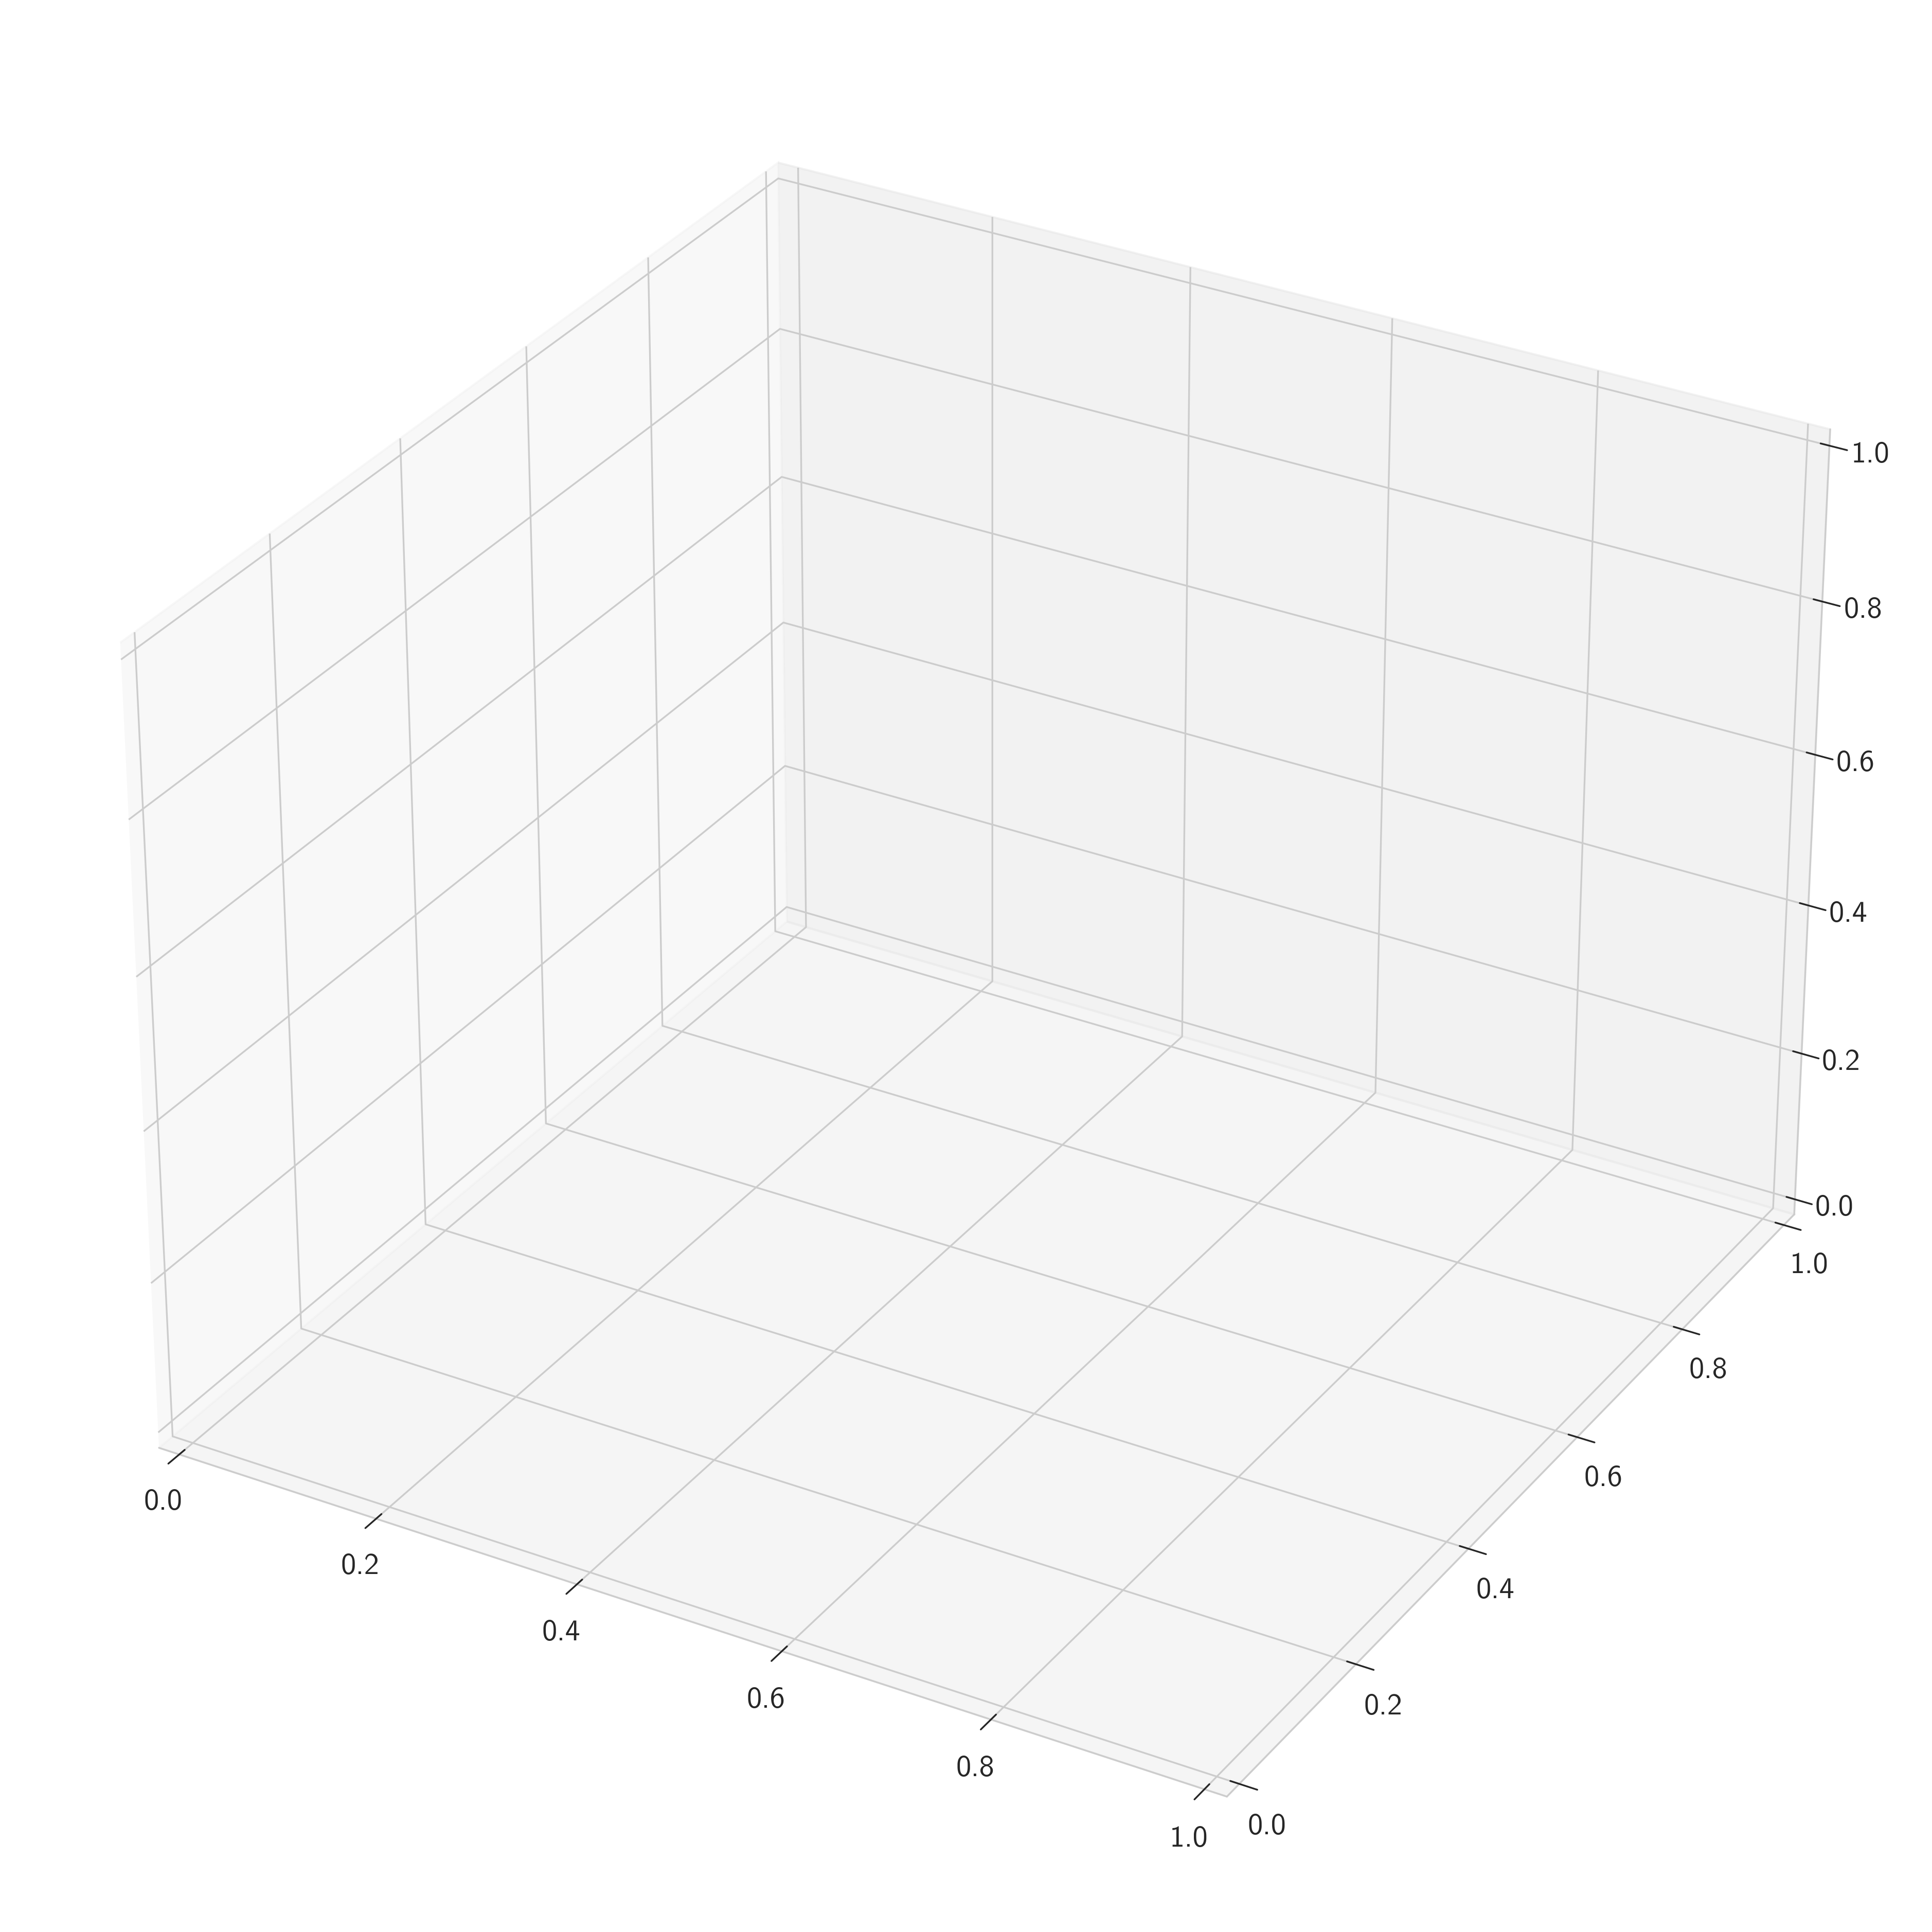

In [5]:
figsize = (17, 8)
fig = plt.figure(figsize=tuple(map(lambda x: 2*x, figsize)), dpi=300)
# fig = plt.figure(figsize=(17, 8), dpi=300)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=1)
ax1 = fig.add_subplot(spec[0], projection='3d')
ax1.plot(np.arange(v_spin.shape[0]), np.ones_like(v_spin) * 0, v_spin, label='SpiNNaker2', lw=1)
ax1.plot(np.arange(v_norse.shape[0]), np.ones_like(v_norse) * 1., v_norse, label='Norse', lw=1)
ax1.set_box_aspect((10, 1, 1))
YLIM = 5
ax1.set_ylim(-YLIM, YLIM)
ax1.set_yticks([])
ax1.legend()
ax1.view_init(elev=10, azim=255, roll=0)

plt.show()
plt.close()

fig = plt.figure(figsize=(17, 8), dpi=300)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 1, 1])

ax2 = fig.add_subplot(spec[1], sharex=ax1)
ax2.plot(abs(v_norse - v_spin) / v_norse.max(), c='gray')
ax2.set_ylabel('Membrane error')
ax2.set_ylim(0-1e-2, 0.1+1e-2)
ax2.set_yticks([0, 0.05, 0.1])
ax2.set_yticklabels(['0%', '5%', '10%'])
ax2.grid()

# TODO: visualize spike timing difference 
# (e.g. area of mismatch on the bottom of the plot)
ax3 = fig.add_subplot(spec[2], sharex=ax1)
ax3.set_ylabel('Spike time error')
ax3.scatter(st_norse, np.ones_like(st_norse), s=20, label='Norse')
ax3.scatter(st_spin, np.ones_like(st_spin) * 2., s=20, label='SpiNNaker2')
ax3.set_ylim(0.5, 2.5)
ax3.set_yticks([])
ax3.legend()

plt.show()